In [271]:
import  numpy as np
from statistics import mean
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('features_30_sec.csv')
n_classes=10

X =  data.drop(["label","filename"],axis = 1)
y = data["label"]

### Dataset

In [272]:
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [273]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [274]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

### Split dataset

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 56)
y_train_roc = label_binarize(y_train, classes=list(y.drop_duplicates().values))
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 76)

### Logistic Regression

In [276]:
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
y_pred_class_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv)
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv, method="predict_proba")

### SGD Classifier

In [277]:
clf_SGD = SGDClassifier()
clf_SGD.fit(X_train, y_train)
y_pred_class_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv)
y_pred_prob_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv, method="decision_function")

### Random Forest Classifier

In [278]:
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)
y_pred_class_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv)
y_pred_prob_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv, method="predict_proba")

### K Neighbors Classifier

In [279]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_class_knn = cross_val_predict(clf_knn, X_train, y_train, cv = cv)
y_pred_prob_knn = cross_val_predict(clf_knn, X_train, y_train, cv = cv, method="predict_proba")

### Neural network
#### Feature extraction

In [280]:
from tensorflow import keras

# from sklearn.preprocessing import LabelEncoder
# convert = LabelEncoder()
# y2 = convert.fit_transform(y)

from sklearn.preprocessing import LabelBinarizer # one hot encoding
label_as_binary = LabelBinarizer()
y2 = label_as_binary.fit_transform(y)

In [281]:
y2

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [282]:
# scaling features
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X2 = fit.fit_transform(np.array(X, dtype=float))

In [283]:
X2

array([[-0.13282213, -0.35013678,  0.31258717, ..., -0.30059734,
         0.60406407, -0.51298758],
       [-0.13282213, -0.46248155,  1.11757233, ..., -0.40708699,
         0.42412706, -0.53842129],
       [-0.13282213, -0.18422456, -0.13770124, ..., -0.52729705,
        -0.29618888, -0.8749539 ],
       ...,
       [-0.13282213,  0.65463736, -1.43198917, ..., -0.63865065,
        -0.26361549, -0.89060474],
       [-0.13282213, -0.19833855,  0.66814351, ..., -0.5114848 ,
        -0.65064889, -0.63768256],
       [-0.13282213, -0.2483391 , -0.05894495, ...,  0.16033426,
         0.5868411 , -0.4526752 ]])

In [284]:
X_train2, x_test2, Y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [285]:
print(X_train2.shape, Y_train2.shape)

(800, 58) (800, 10)


In [286]:
print(x_test2.shape, y_test2.shape)

(200, 58) (200, 10)


#### Building model

In [287]:
# CNN
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(512,input_shape=(X_train2.shape[1],), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [288]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               30208     
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)               

In [289]:

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [290]:
loss_object = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

model.compile(
    loss=loss_object,
    optimizer=optimizer,
    metrics=METRICS)

In [291]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [292]:
history = model.fit(X_train2, Y_train2,
                    validation_data=(x_test2, y_test2),
                    epochs=600,
                    callbacks=[earlystop,modelcheck],
                    batch_size=128)

Epoch 1/600
1/7 [===>..........................] - ETA: 11s - loss: 2.3265 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1152.0000 - fn: 128.0000 - accuracy: 0.9000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4985
Epoch 00001: val_accuracy improved from -inf to 0.90300, saving model to best_model.hdf5
7/7 [==============================] - 3s 176ms/step - loss: 2.1528 - tp: 6.0000 - fp: 0.0000e+00 - tn: 7200.0000 - fn: 794.0000 - accuracy: 0.9008 - precision: 1.0000 - recall: 0.0075 - auc: 0.6448 - val_loss: 1.9215 - val_tp: 6.0000 - val_fp: 0.0000e+00 - val_tn: 1800.0000 - val_fn: 194.0000 - val_accuracy: 0.9030 - val_precision: 1.0000 - val_recall: 0.0300 - val_auc: 0.7895
Epoch 2/600
1/7 [===>..........................] - ETA: 0s - loss: 1.9539 - tp: 10.0000 - fp: 2.0000 - tn: 1150.0000 - fn: 118.0000 - accuracy: 0.9062 - precision: 0.8333 - recall: 0.0781 - auc: 0.7303
Epoch 00002: val_accuracy improved from 0.90300 to 0.91550, saving model to best_model.hdf5
7/7 [=============

In [293]:
history.history

{'loss': [2.1527810096740723,
  1.819480299949646,
  1.5815585851669312,
  1.3760522603988647,
  1.2643940448760986,
  1.1475000381469727,
  1.039047360420227,
  0.9662872552871704,
  0.8979281783103943,
  0.8203348517417908,
  0.7512881755828857,
  0.6632875204086304,
  0.6509461402893066,
  0.5985849499702454,
  0.5541781187057495,
  0.48701465129852295,
  0.49045613408088684,
  0.44571903347969055,
  0.42662742733955383,
  0.4012922942638397,
  0.3486380875110626,
  0.32186198234558105,
  0.3872493803501129,
  0.3120291531085968,
  0.2818811535835266,
  0.27760517597198486,
  0.26265227794647217,
  0.2477625459432602,
  0.2061615139245987,
  0.22478309273719788,
  0.21948571503162384,
  0.182205930352211,
  0.19599036872386932,
  0.18038243055343628,
  0.17104856669902802,
  0.17096920311450958],
 'tp': [6.0,
  102.0,
  151.0,
  212.0,
  271.0,
  345.0,
  373.0,
  401.0,
  428.0,
  454.0,
  495.0,
  539.0,
  562.0,
  571.0,
  587.0,
  606.0,
  614.0,
  630.0,
  638.0,
  651.0,
  668

25/25 - 1s - loss: 0.0363 - tp: 795.0000 - fp: 3.0000 - tn: 7197.0000 - fn: 5.0000 - accuracy: 0.9990 - precision: 0.9962 - recall: 0.9937 - auc: 1.0000 - 1s/epoch - 40ms/step


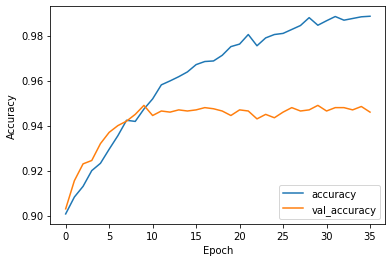

In [294]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# test_loss, test_tp, test_fp, test_tn, test_fn, test_acc, test_precision, test_recall, test_auc = model.evaluate(x_test2,  y_test2, verbose=2)
train_loss, train_tp, train_fp, train_tn, train_fn, train_acc, train_precision, train_recall, train_auc = model.evaluate(X_train2,  Y_train2, verbose=2)

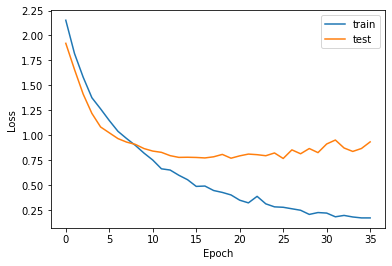

In [295]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [296]:
from sklearn.base import BaseEstimator
import numpy as np

class BaseClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

base_clf = BaseClassifier()
cross_val_score(base_clf, X_train, y_train, cv=10, scoring="accuracy").mean()

0.0

### Accuracy

In [297]:
acc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_knn = cross_val_score(clf_knn, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_cnn = train_acc

In [298]:
acc_logreg, acc_SGD, acc_rfc, acc_knn, acc_cnn

(0.3106666666666667, 0.2, 0.784, 0.2653333333333333, 0.9990000128746033)

### Log loss

In [316]:
logloss_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_knn = cross_val_score(clf_knn, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

from sklearn.calibration import CalibratedClassifierCV

new_clf_SGD = CalibratedClassifierCV(clf_SGD)
new_clf_SGD.fit(X_train, y_train)
logloss_SGD = cross_val_score(new_clf_SGD, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_cnn = train_loss

In [317]:
logloss_logreg, logloss_SGD, logloss_rfc, logloss_knn, logloss_cnn

(-1.9397196693774643,
 -2.3030686521768624,
 -0.9277674308298804,
 -13.885557752475489,
 0.03630606085062027)

### ROC AUC

In [301]:
def fpr_tpr_roc_auc(y_binarized, y_pred_prob):
    fpr = dict()
    tpr = dict()
    threshold = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], threshold[i] = roc_curve(y_binarized[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_binarized.ravel(), y_pred_prob.ravel())
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr, tpr, threshold, roc_auc

In [302]:
def roc_plot(fpr, tpr,roc_auc):

    plt.figure(figsize=(20,10))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

#### ROC AUC Logistic Regression

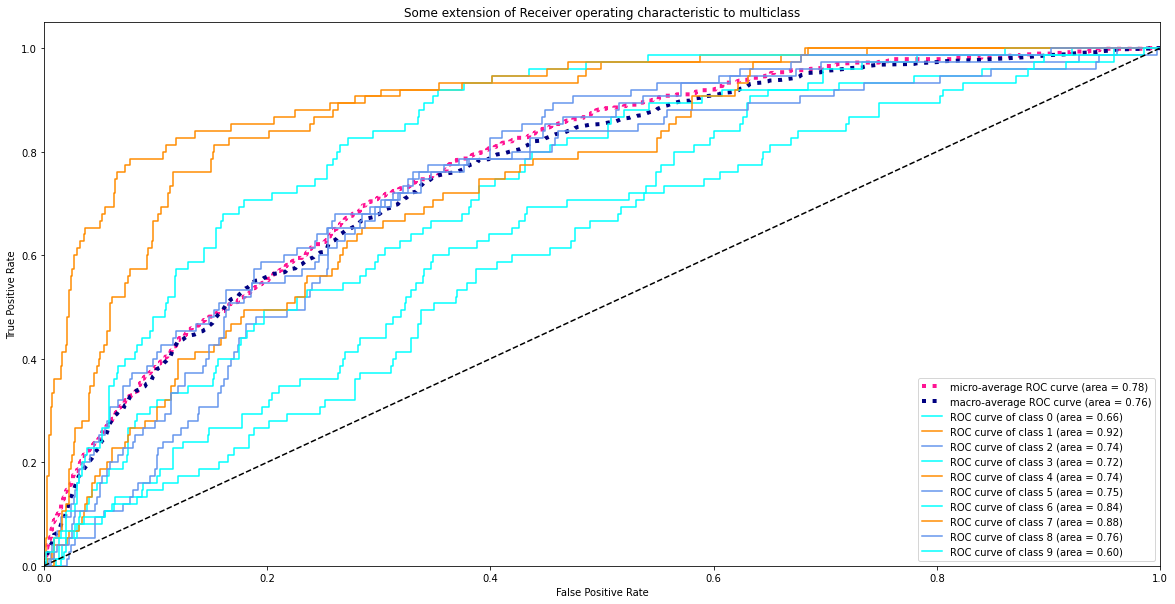

In [303]:
fpr_logreg, tpr_logreg, threshold_logreg, roc_auc_logreg=fpr_tpr_roc_auc(y_train_roc,y_pred_prob_logreg)

roc_plot(fpr_logreg, tpr_logreg, roc_auc_logreg)

#### ROC AUC Random Forest Classifier

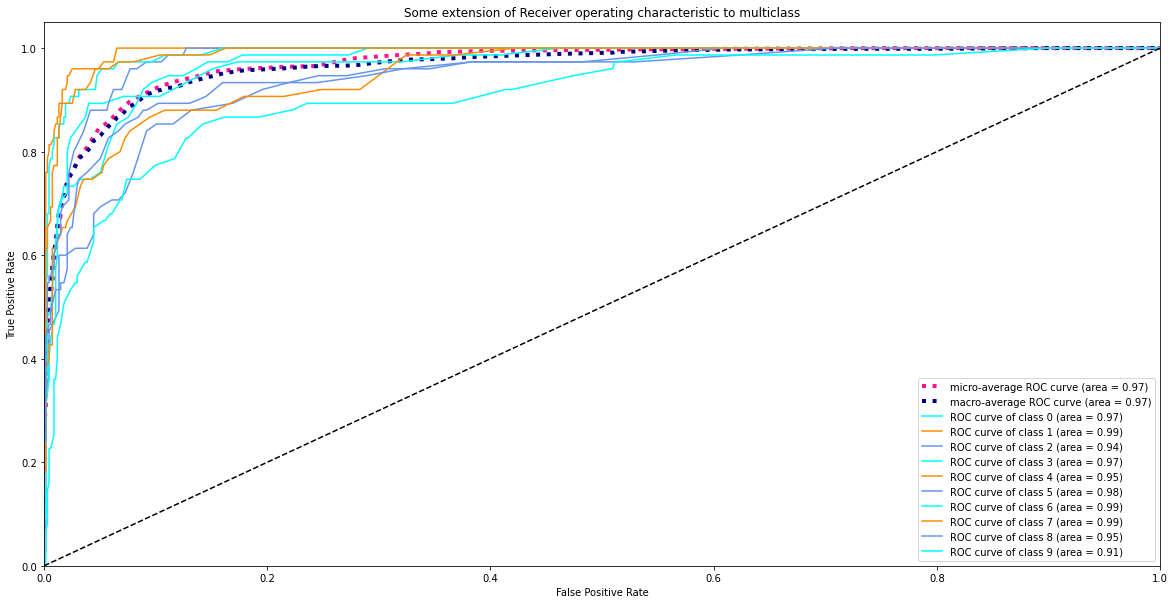

In [304]:
fpr_rfc, tpr_rfc, threshold_rfc,roc_auc_rfc=fpr_tpr_roc_auc(y_train_roc,y_pred_prob_rfc)

roc_plot(fpr_rfc, tpr_rfc, roc_auc_rfc)

#### ROC AUC SGD Classifier

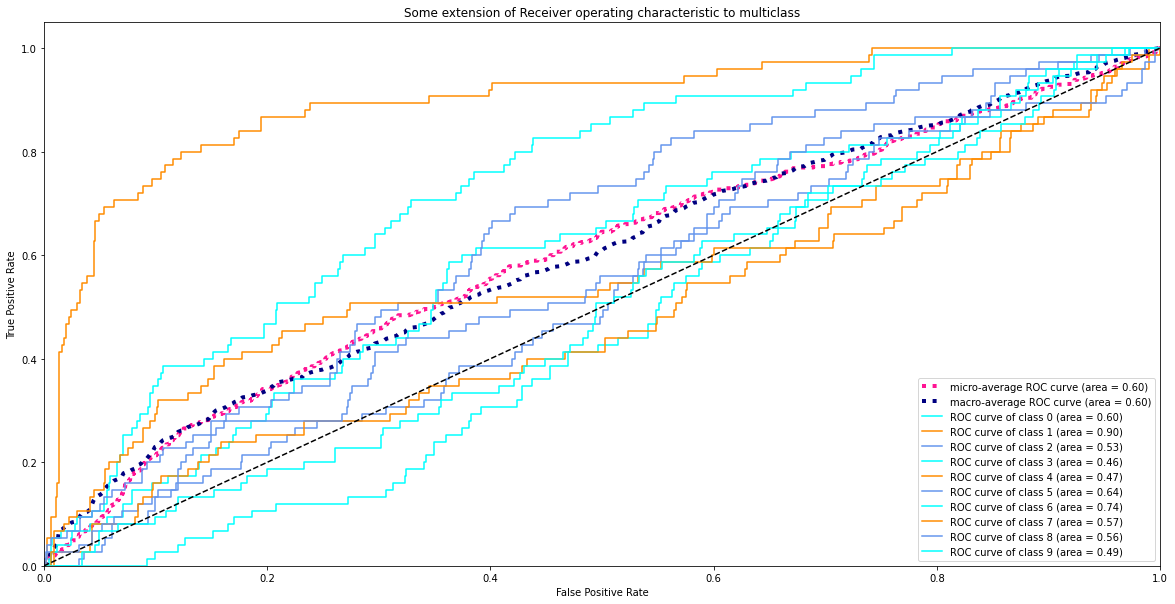

In [305]:
fpr_sgd, tpr_sgd, threshold_sgd,roc_auc_sgd=fpr_tpr_roc_auc(y_train_roc,y_pred_prob_SGD)

roc_plot(fpr_sgd, tpr_sgd, roc_auc_sgd)

#### ROC AUC KNN CLassifier

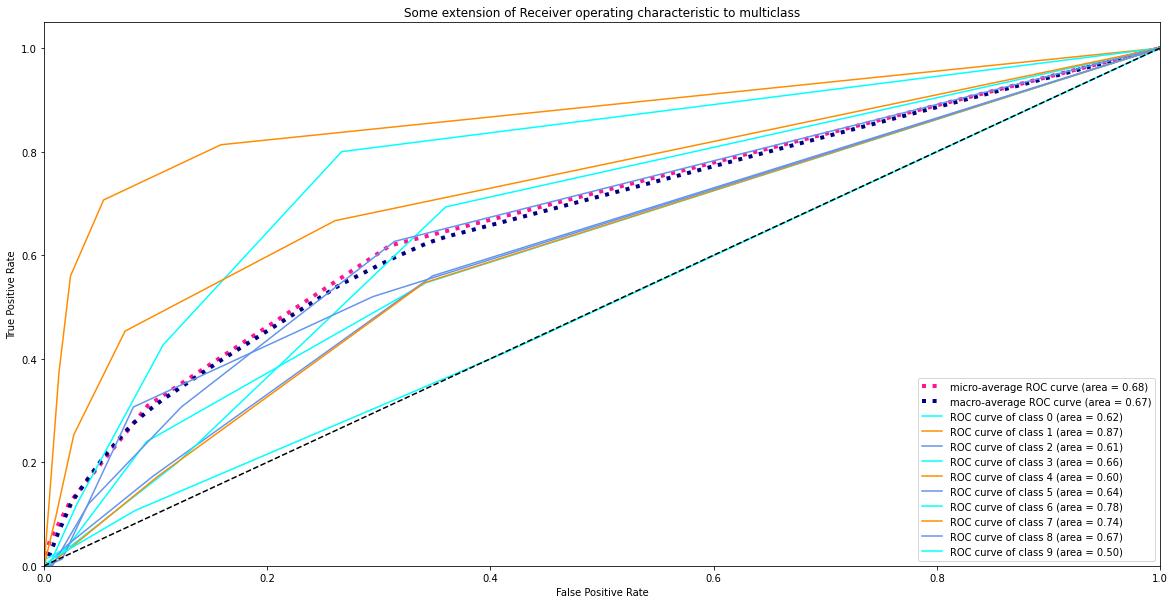

In [306]:
fpr_knn, tpr_knn, threshold_knn,roc_auc_knn=fpr_tpr_roc_auc(y_train_roc,y_pred_prob_knn)

roc_plot(fpr_knn, tpr_knn, roc_auc_knn)


#### ROC AUC CNN

In [327]:
y_pred_cnn = model.predict(X_train2)
y_pred_cnn = y_pred_cnn.argmax(axis=-1)
# y_pred_cnn

In [328]:
y_train_cnn = Y_train2.argmax(axis=-1)
# y_train_cnn

ROC AUC score: 0.9966050966868085


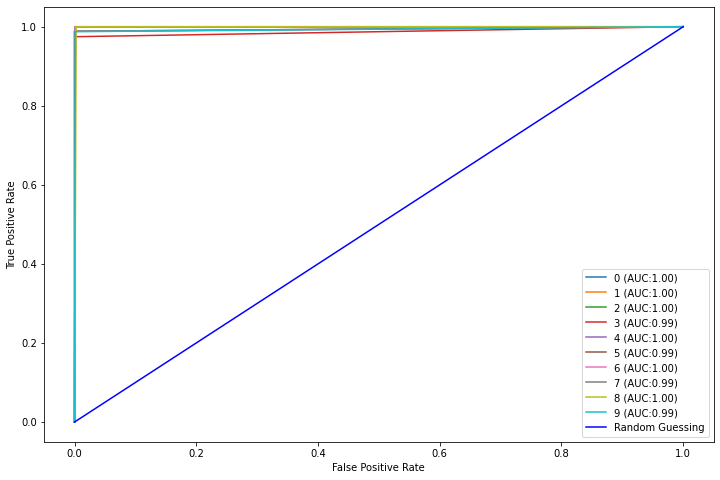

In [309]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_train_cnn, y_pred_cnn))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [310]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    return tpr[clf_threshold > threshold][-1], 1 - fpr[clf_threshold > threshold][-1]

In [311]:
evaluate_threshold(tpr_sgd[0], fpr_sgd[0], threshold_sgd[0], 0.2), evaluate_threshold(fpr_rfc[0], fpr_rfc[0], fpr_rfc[0], 0.8)

((0.06666666666666667, 0.9851851851851852), (1.0, 0.0))

In [314]:
roc_auc_mean_logreg=[roc_auc_logreg[i] for i in range(10)]
roc_auc_mean_sgd=[roc_auc_sgd[i] for i in range(10)]
roc_auc_mean_rfc=[roc_auc_rfc[i] for i in range(10)]
roc_auc_mean_knn=[roc_auc_knn[i] for i in range(10)]
roc_auc_cnn= train_auc
mean(roc_auc_mean_logreg),mean(roc_auc_mean_sgd),mean(roc_auc_mean_rfc),mean(roc_auc_mean_knn)



(0.7620325925925926,
 0.5943940740740741,
 0.9658251851851852,
 0.6688395061728395)

(0.7620325925925926,
 0.5943940740740741,
 0.9658251851851852,
 0.6688395061728395)

### Precision, recall, f1-score

In [318]:
report_logreg = metrics.classification_report(y_train, y_pred_class_logreg)   
report_SGD = metrics.classification_report(y_train, y_pred_class_SGD)
report_rfc = metrics.classification_report(y_train, y_pred_class_rfc)
report_knn = metrics.classification_report(y_train, y_pred_class_knn)
report_cnn = metrics.classification_report(Y_train2, y_pred_cnn) # cnn ma inny shape jak nizej zobaczysz tych train i pred jak Twoje modele

print("report_logreg " +  "\n" + report_logreg,"report_SGD "  +  "\n" +  report_SGD,"report_rfc "  +  "\n" +  report_rfc,"report_knn "  +  "\n" +  report_knn, sep = "\n")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [323]:
y_train.shape

(750,)

In [322]:
Y_train2.shape

(800, 10)

In [325]:
y_pred_class_knn.shape

(750,)

In [326]:
y_pred_cnn.shape

(800,)